Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Load and Explore the Dataset

In [ ]:
df = pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


Data Cleaning and Feature Engineering

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Feature engineering
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
df['total_sulfur_dioxide'] = df['free sulfur dioxide'] + df['total sulfur dioxide']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,total_acidity,total_sulfur_dioxide
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0,8.10,45.00
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1,8.68,92.00
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,2,8.56,69.00
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,3,11.48,77.00
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,4,8.10,45.00


In [ ]:
# Normalizing data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['quality']))

Data Exploration and Visualization

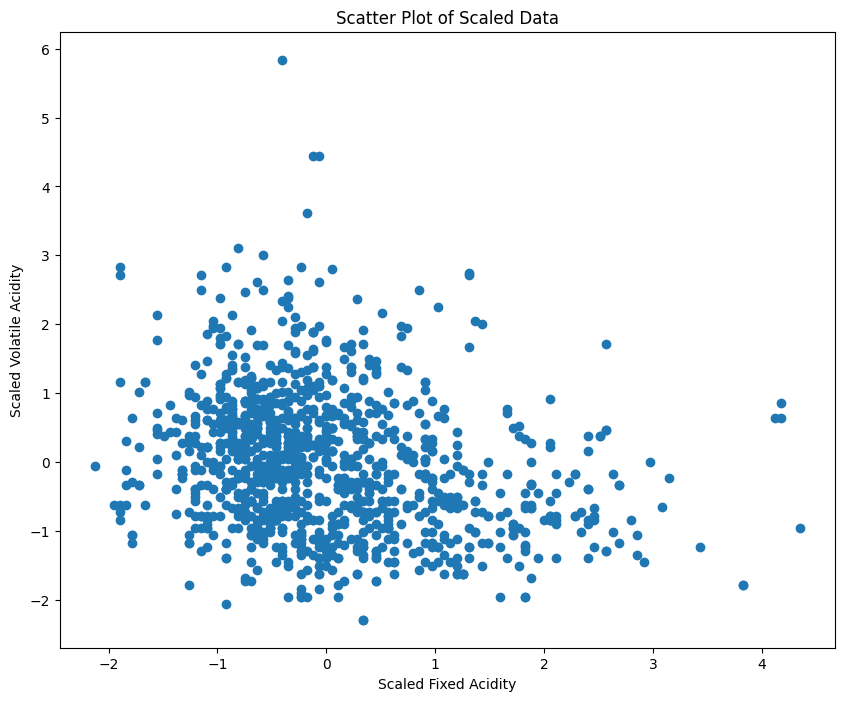

In [ ]:
# Scatter plot to visualize data
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1])
plt.xlabel('Scaled Fixed Acidity')
plt.ylabel('Scaled Volatile Acidity')
plt.title('Scatter Plot of Scaled Data')
plt.show()

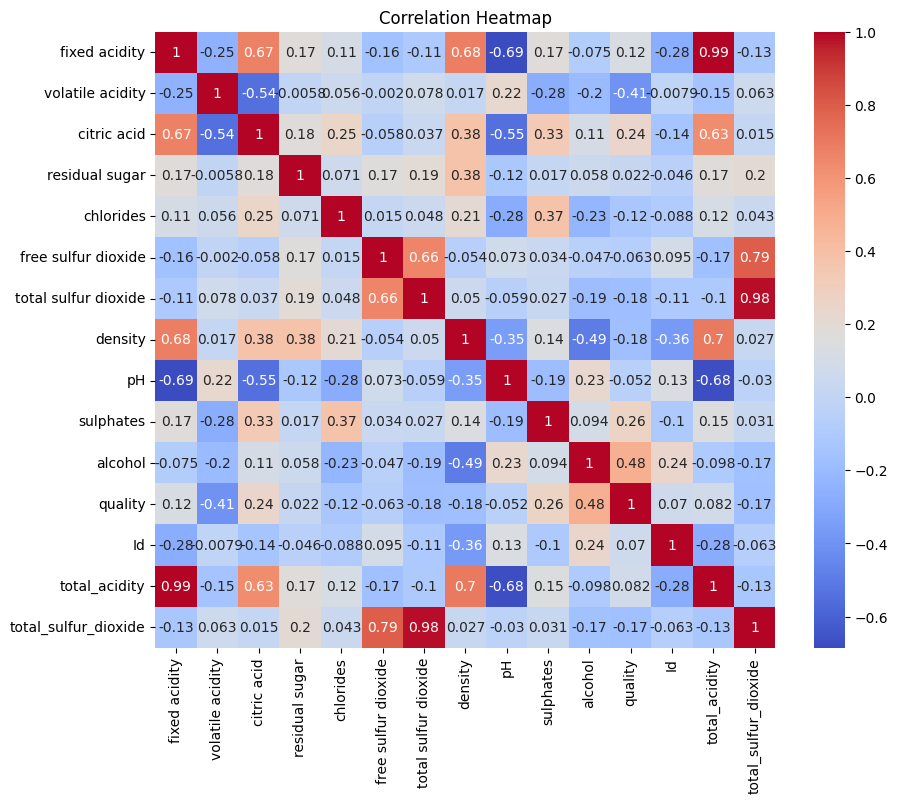

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Training Unsupervised Models

Silhouette Score: 0.19186874598068301


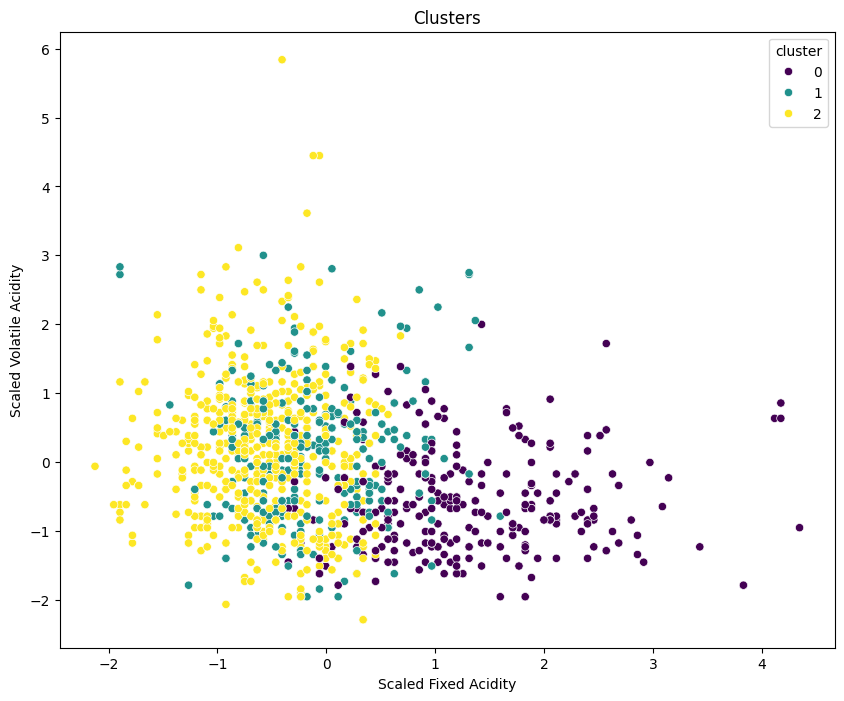

In [ ]:
# Define K-mean model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Predict clusters
df['cluster'] = kmeans.predict(df_scaled)

# Evaluate model using silhouette score
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.xlabel('Scaled Fixed Acidity')
plt.ylabel('Scaled Volatile Acidity')
plt.title('Clusters')
plt.show()

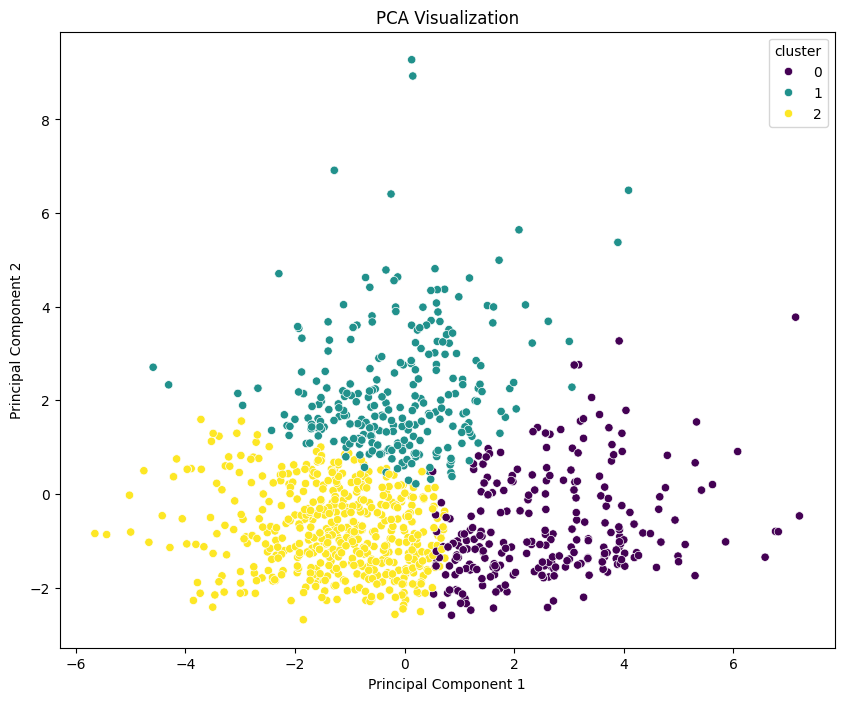

In [ ]:
# Define PCA model
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Visualize data in reduced space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=df['cluster'], data=df_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

Model Comparison and Recommendation

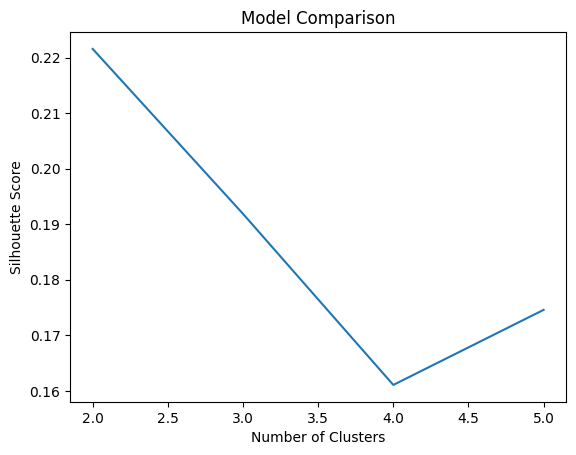

In [ ]:
models = [KMeans(n_clusters=i) for i in range(2, 6)]
silhouette_scores = []

for model in models:
    model.fit(df_scaled)
    labels = model.labels_
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Model Comparison')
plt.show()

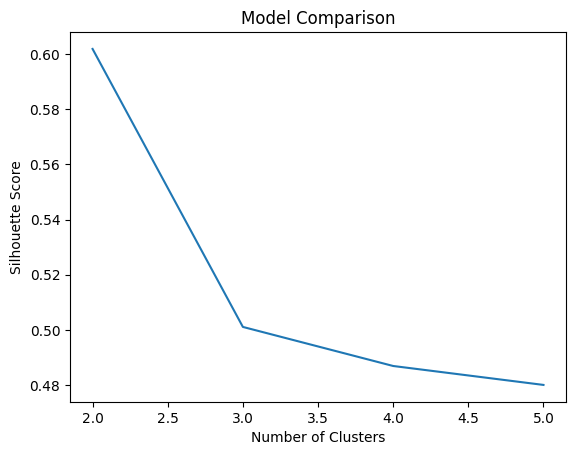

In [ ]:
models = [KMeans(n_clusters=i) for i in range(2, 6)]
silhouette_scores = []

for model in models:
    model.fit(df[['fixed acidity', 'volatile acidity']])
    labels = model.labels_
    score = silhouette_score(df[['fixed acidity', 'volatile acidity']], labels)
    silhouette_scores.append(score)

plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Model Comparison')
plt.show()